# Integrantes:
*   Arduña Zago, Agustin Juan Luis
*   Barabas, Axel Daniel   
*   Franco, Rodrigo Román
*   Quiroz, Luis Ariel
*   Velazco Gez Schegtel, Juan Ignacio








# Etapa 2:
Investigación Librerías de Python en el Cálculo Numérico y Simbólico

## **1) Investiga la librería NumPy y explica cómo se realizan las siguientes operaciones con matrices: Multiplicación de matrices, Cálculo de la inversa de una matriz, Cálculo de valores propios y vectores propios de una matriz. Proporciona ejemplos de código en Python utilizando NumPy.**

a) Multiplicación de matrices

Se escribe ***np.matmul(A, B)*** (o ***np.dot(A, B)***) donde A y B son matrices de entrada, no se permiten escalares; NumPy hace el producto fila X columna. La condición que debe cumplirse es que las columnas de A sea igual a las filas de B.
El @ El operador se puede utilizar como abreviatura de np.matmul en ndarrays (***A @ B***).

El comportamiento depende de los argumentos de la siguiente manera:

-Si ambos argumentos son 2-D se multiplican como lo convencional matrices.

-Si cualquiera de los argumentos es ND, N > 2, se trata como una pila de matrices que residen en los dos últimos índices y se transmiten en consecuencia.

-Si el primer argumento es 1-D, se promueve a una matriz mediante anteponiendo un 1 a sus dimensiones. Después de la multiplicación de matrices Se elimina el 1 antepuesto.

-Si el segundo argumento es 1-D, se promueve a una matriz mediante añadiendo un 1 a sus dimensiones. Después de la multiplicación de matrices Se elimina el 1 adjunto.

Bibliografía:
https://numpy.org/doc/stable/reference/generated/numpy.matmul.html

In [ ]:
import numpy as np

A = np.array([[1, 2, 3],
              [4, 5, 6]])          # 2x3
B = np.array([[1, 0],
              [0, 1],
              [1, 1]])             # 3x2

C = A @ B
print(C)
#El resultado deberia ser:
# [[ 4  5]
#  [10 11]]

[[ 4  5]
 [10 11]]


b) Inversa de una matriz

Calculamos la inversa con ***np.linalg.inv(A)***, donde A es la matriz a invertir. Solo funciona si A es cuadrada y no singular (determinante ≠ 0). Para resolver Ax=b, es mejor np.***linalg.solve(A, b)***.
Para verificar que A sea cuadrada utilizamos ***A.shape[0] == A.shape[1]***.

Bibliografía:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [ ]:
import numpy as np

A = np.array([[2., 1.],
              [5., 3.]])

# Chequeos
detA = np.linalg.det(A)       # ≠ 0 ⇒ invertible
condA = np.linalg.cond(A)     # si es muy grande, mala precisión

A_inv = np.linalg.inv(A)

# Verificación: A @ A_inv ≈ 1
print(np.allclose(A @ A_inv, np.eye(2)))  # True

print(A_inv)


True
[[ 3. -1.]
 [-5.  2.]]


3) Valores y vectores propios

Para una matriz cuadrada general, se usa ***np.linalg.eig(A)***, donde A es la matriz cuadrada, que devuelve (w, v) donde w son los valores propios y v las columnas son sus vectores propios. Si la matriz es simétrica, se usa ***np.linalg.eigh*** que es más estable.

Para verificar se realiza lo siguiente: se toma cada pareja
(𝜆𝑖,𝑣𝑖) dada por w[i] y la columna v[:, i], se calcula 𝐴𝑣𝑖 y se compara con 𝜆𝑖 𝑣𝑖. Si ambas expresiones coinciden (en la práctica, “casi” por redondeo numérico), se confirma que v[:, i] es efectivamente un vector propio asociado al valor propio w[i]. En NumPy se utiliza ***Av = A @ v[:, i]*** y  ***lamb_v = w[i] * v[:, i]***; la comparación práctica es ***np.allclose(Av, lamb_v)***

Bibliografía:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
import numpy as np

A = np.array([[2., 1.],
              [1., 2.]])

w, v = np.linalg.eig(A)   # para simétrica: np.linalg.eigh(A)
print("Valores propios:", w)
print("Vectores propios (columnas):\n", v)

# Comprobación de Av = λv para el primer par propio
i = 0
print("Av:", A @ v[:, i])
print("λv:", w[i] * v[:, i])

Av = A @ v[:, i]
lamb_v = w[i] * v[:, i]

np.allclose(Av, lamb_v) #True


Valores propios: [3. 1.]
Vectores propios (columnas):
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Av: [2.12132034 2.12132034]
λv: [2.12132034 2.12132034]


True

## **2) ¿Qué es SymPy y en qué áreas del cálculo diferencial se utiliza? Investiga cómo esta librería facilita la resolución simbólica de ecuaciones diferenciales y qué ventajas tiene sobre métodos puramente numéricos.**

Es un sistemas de álgebra computacional escrito y se ejecuta completamente en python, es de código abierto con licencia BSD liberal. Puede derivar, integrar, calcular límites y series, resolver ecuaciones (incluidas diferenciales), manipular matrices, imprimir en LaTeX, etc., todo de forma exacta (simbólica) y no solo con números aproximados.

Áreas del cálculo diferencial donde se usa:

- Derivadas, límites, integrales y series de Taylor/Maclaurin (módulo de “Calculus”).
- Ecuaciones diferenciales ordinarias (EDO) con dsolve (incluye condiciones iniciales/borde con ics=).
- Ecuaciones en derivadas parciales (EDP) con pdsolve (para clases soportadas).
- Transformadas (p.ej., Laplace) para resolver EDO/EDP o condiciones iniciales.

Cómo facilita la resolución simbólica

SymPy permite resolver ecuaciones diferenciales de manera analítica mediante comandos como dsolve().
Por ejemplo:

In [ ]:
from sympy import symbols, Function, dsolve, Eq, Derivative

t = symbols('t')
x = Function('x')(t)
ecuacion = Eq(Derivative(x, t, t) + 3*Derivative(x, t) + 2*x, 0)
solucion = dsolve(ecuacion)
print(solucion)


Eq(x(t), (C1 + C2*exp(-t))*exp(-t))


Ventajas frente a los métodos puramente numéricos

- Precisión exacta: no depende de aproximaciones o redondeos.

- Interpretación teórica: permite analizar la forma general de la solución.

- Automatización simbólica: facilita derivar, integrar y simplificar expresiones complejas.

- Combinación con cálculo numérico: puede usarse junto con librerías como NumPy o Matplotlib para validar o visualizar resultados.

Bibliografia: https://docs.sympy.org/latest/modules/solvers/ode.html

## **3) Describe brevemente las funciones principales de la librería SciPy para resolver ecuaciones diferenciales. En particular, investiga las funciones odeint y solve_ivp. ¿En qué situaciones es mejor utilizar una u otra?**

La librería SciPy (Scientific Python) es una de las herramientas más utilizadas en el ámbito científico y de la ingeniería para el análisis numérico y la resolución de ecuaciones diferenciales ordinarias (EDOs). A diferencia de SymPy, que realiza cálculos simbólicos, SciPy trabaja mediante métodos numéricos, permitiendo obtener soluciones aproximadas cuando las ecuaciones no pueden resolverse de manera analítica.

Entre las funciones principales que ofrece el submódulo scipy.integrate, se destacan odeint y solve_ivp, ambas diseñadas para resolver EDOs de la forma:

                                  dy/dt​=f(y,t)


*   **Función odeint**

    La función odeint (Ordinary Differential Equation Integrator) está basada en el integrador LSODA del paquete FORTRAN ODEPACK. Esta función ajusta automáticamente el método de integración entre Adams (para sistemas no rígidos) y BDF (para sistemas rígidos).
    Se caracteriza por su simplicidad de uso y gran robustez, siendo ideal para resolver sistemas de EDOs relativamente simples y cuando no se requiere un control fino sobre las condiciones del solver.

    *Ventajas principales:*

    - Detecta automáticamente la rigidez del sistema.

    - Es muy estable y confiable para problemas estándar.

    - Requiere poca configuración por parte del usuario.

    
*   **Función solve_ivp**

    La función solve_ivp (Solve Initial Value Problem) es una alternativa más moderna y flexible introducida en versiones recientes de SciPy. Permite seleccionar explícitamente el método de integración, como RK45 (Runge-Kutta de orden 5(4)), Radau, BDF, LSODA, entre otros.
    Ofrece una interfaz unificada con mayor control sobre la integración, tolerancias, puntos de evaluación y manejo de eventos.

    *Ventajas principales:*

    - Permite elegir el método de integración.

    - Brinda más opciones de configuración y personalización.

    - Es más adecuada para proyectos de investigación o simulaciones que requieren control detallado del proceso numérico.

*   **Cuando utilizar una u otra**

    - **odeint** es más apropiada para problemas sencillos, en los que se busca una solución rápida y confiable sin necesidad de especificar el método.

    - **solve_ivp** se recomienda para casos más complejos o de investigación, donde se necesita ajustar parámetros, controlar la precisión o explorar distintos métodos de integración.

**Bibliografía**: https://docs.scipy.org/doc/scipy/reference/integrate.html

## **4) ¿Cómo se utiliza Matplotlib para graficar campos vectoriales? Realiza una búsqueda sobre la función quiver. Explica qué parámetros necesita y cómo se puede representar un campo vectorial.**

La librería Matplotlib es una de las herramientas más utilizadas en Python para la representación gráfica de datos científicos y matemáticos. Entre sus múltiples funcionalidades, permite graficar campos vectoriales mediante la función quiver(), la cual se encuentra dentro del módulo matplotlib.pyplot.

Un campo vectorial es una representación en la que a cada punto del plano (x, y) se le asocia un vector que indica una dirección y una magnitud. Este tipo de gráfico es especialmente útil para visualizar flujos, velocidades, gradientes o direcciones de movimiento en sistemas dinámicos.


*   **Uso de la función quiver()**

    La sintaxis básica de la función es: plt.quiver(X, Y, U, V)

    **Donde:**

    - X y Y representan las coordenadas de los puntos en el plano donde se ubican los vectores.
    - U y V son los componentes del vector en las direcciones x e y, respectivamente.
    - Opcionalmente, se pueden agregar parámetros adicionales como: color, escala, angulos.



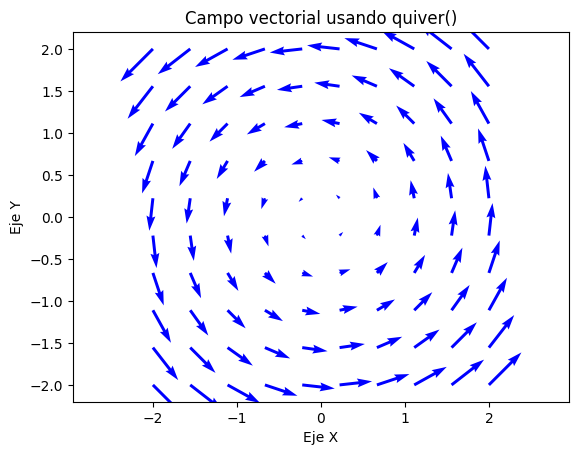

In [ ]:
#Ejemplo básico se muestra como graficar un campo vectorial basico
import numpy as np
import matplotlib.pyplot as plt

# Definir una malla de puntos
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)

# Definir los componentes del campo vectorial
U = -Y
V = X

# Graficar el campo vectorial
plt.quiver(X, Y, U, V, color='blue')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Campo vectorial usando quiver()')
plt.axis('equal')
plt.show()


En este caso, el campo definido por U = -Y y V = X corresponde a un campo rotacional, donde los vectores giran en torno al origen. La función quiver() genera las flechas que indican la dirección y la magnitud de dicho campo.

**Interpretación**
Cada flecha del gráfico representa el vector correspondiente a un punto (x, y) del plano.
La dirección de la flecha muestra el sentido del campo, mientras que su longitud indica la magnitud del vector en esa posición.

**Bibliografía**: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html


## **5) Toma una ecuación diferencial de la guía de trabajos prácticos y resuélvela usando SymPy y SciPy respectivamente. Compara los enfoques simbólico y numérico. ¿En qué casos preferirías usar uno u otro método?**

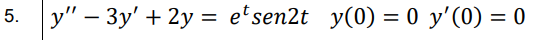

y(t) =

⎛   t                            ⎞  t
⎝4⋅ℯ  - 2⋅sin(2⋅t) + cos(2⋅t) - 5⎠⋅ℯ 
─────────────────────────────────────
                 10                  

Chequeo simbólico (LHS - RHS):
0


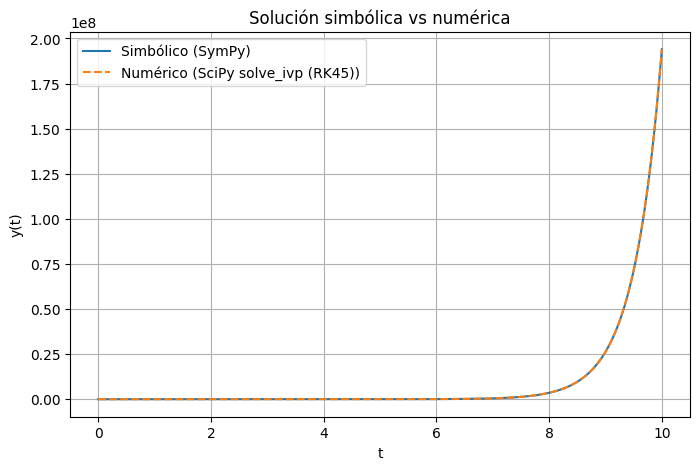

Error absoluto máx: 6.753e-01
Error relativo máx: 1.842e-07


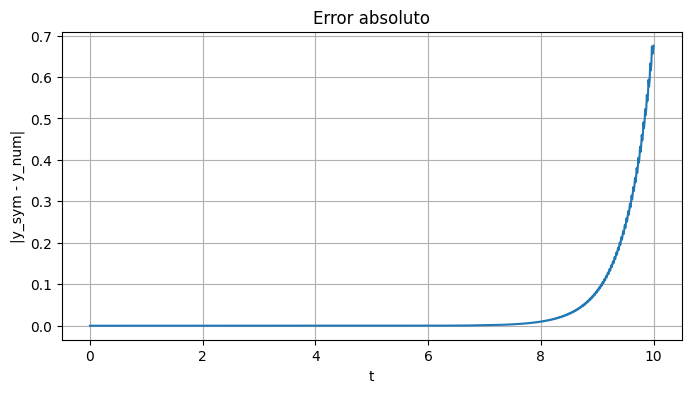

In [ ]:
# y'' - 3 y' + 2 y = e^t sin(2t),   y(0)=0,  y'(0)=0

import numpy as np
import sympy as sp
from math import isfinite

# Simbólico con SymPy
t = sp.symbols('t', real=True)
y = sp.Function('y')(t)

ode = sp.Eq(sp.diff(y, t, 2) - 3*sp.diff(y, t) + 2*y, sp.exp(t)*sp.sin(2*t))
sol_sym = sp.dsolve(ode, ics={y.subs(t, 0): 0, sp.diff(y, t).subs(t, 0): 0})
y_sym_expr = sp.simplify(sol_sym.rhs)

print("y(t) =\n")
sp.pprint(y_sym_expr)

# Verificación simbólica rápida: lado izq(LHS) - lado der(RHS) == 0
residuo = sp.simplify(
    (sp.diff(y_sym_expr, t, 2) - 3*sp.diff(y_sym_expr, t) + 2*y_sym_expr)
    - sp.exp(t)*sp.sin(2*t)
)
print("\nChequeo simbólico (LHS - RHS):")
sp.pprint(residuo)

# Numérico con SciPy (solve_ivp)
# Defino el sistema de 1er orden: Y = [y, y'],  Y' = [y', 3y' - 2y + e^t sin(2t)]
def f_system(t, Y):
    y, yp = Y
    ypp = 3*yp - 2*y + np.exp(t)*np.sin(2*t)
    return np.array([yp, ypp], dtype=float)

T0, T1 = 0.0, 10.0
t_eval = np.linspace(T0, T1, 1000)
Y0 = [0.0, 0.0]

try:
    from scipy.integrate import solve_ivp
    sol_num = solve_ivp(f_system, (T0, T1), Y0, t_eval=t_eval,
                        method="RK45", rtol=1e-9, atol=1e-12)
    t_grid = sol_num.t
    y_num = sol_num.y[0]
    backend = "SciPy solve_ivp (RK45)"
except Exception as e:
    # Fallback RK4 simple si SciPy no está disponible
    t_grid = t_eval
    h = t_grid[1] - t_grid[0]
    Y = np.zeros((2, len(t_grid)))
    Y[:, 0] = Y0
    for k in range(len(t_grid) - 1):
        tk = t_grid[k]
        Yk = Y[:, k]
        k1 = f_system(tk, Yk)
        k2 = f_system(tk + 0.5*h, Yk + 0.5*h*k1)
        k3 = f_system(tk + 0.5*h, Yk + 0.5*h*k2)
        k4 = f_system(tk + h,     Yk + h*k3)
        Y[:, k+1] = Yk + (h/6.0)*(k1 + 2*k2 + 2*k3 + k4)
    y_num = Y[0, :]
    backend = "RK4 casero (fallback)"

# --- Comparación y gráficos ---
import matplotlib.pyplot as plt

y_sym = sp.lambdify(t, y_sym_expr, "numpy")
y_sym_vals = y_sym(t_grid)

plt.figure(figsize=(8,5))
plt.plot(t_grid, y_sym_vals, label="Simbólico (SymPy)")
plt.plot(t_grid, y_num, "--", label=f"Numérico ({backend})")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solución simbólica vs numérica")
plt.legend()
plt.grid(True)
plt.show()

# Error absoluto y relativo
abs_err = np.abs(y_sym_vals - y_num)
with np.errstate(divide='ignore', invalid='ignore'):
    rel_err = abs_err / np.maximum(np.abs(y_sym_vals), 1e-15)

print(f"Error absoluto máx: {np.max(abs_err):.3e}")
print(f"Error relativo máx: {np.max(rel_err[np.isfinite(rel_err)]):.3e}")

plt.figure(figsize=(8,4))
plt.plot(t_grid, abs_err)
plt.xlabel("t")
plt.ylabel("|y_sym - y_num|")
plt.title("Error absoluto")
plt.grid(True)
plt.show()

### ¿Cuándo utilizar cada enfoque?
Se utiliza el enfoque simbólico (SymPy) cuando queremos una fórmula exacta para y(t) y entender la estructura de la solución: qué términos hacen que crezca o decaiga, si oscila, cómo influyen las condiciones iniciales, etc. Suele funcionar muy bien en EDO lineales con coeficientes constantes y forzamientos “limpios” (exponenciales, senos/cosenos, polinomios). Permite verificar de forma exacta que la solución que satisface la ecuación y es ideal para informes y explicación teórica. Sus límites aparecen cuando la forma cerrada es inexistente, muy complicada o el problema es grande y el álgebra simbólica se vuelve pesada.

Se utiliza el enfoque numérico (SciPy) cuando necesitamos valores y gráficos sin importar tener una fórmula, o cuando no hay solución cerrada práctica. Es la opción natural para sistemas grandes o no lineales, problemas rígidos (con métodos como BDF/Radau), simulaciones con parámetros cambiantes, eventos o ruido/datos reales. Te da rapidez y control del error a través de tolerancias, escala bien y es flexible para explorar escenarios. A cambio, no se obtendrá una expresión simbólica y se debe vigilar la precisión (ajustando tolerancias, método y paso) para asegurar resultados confiables.

## **6) Investiga cómo realizar la Transformada de Laplace utilizando SymPy. Explica el uso de las funciones laplace_transform e inverse_laplace_transform. ¿En qué aplicaciones prácticas crees que esta herramienta es útil?**

Transformada de Laplace en SymPy

a) **laplace_transform(f, t, s, noconds=False)**

Calcula L{f(t)}(s)

Parámetros:

- f: expresión en 𝑡.
- t: variable de tiempo.
- s: variable del dominio de Laplace.
- noconds (opcional): si = True, devuelve solo la transformada F(s); si = False (default), devuelve una tupla (F, a, cond) donde:
  - F: es la transformada,
  - a: describe el semiplano de convergencia (típicamente una cota para Re(s)),
  - cond: son condiciones auxiliares de convergencia.
    - Devuelve: F o (F, a, cond) según noconds.


In [ ]:
from sympy import symbols, laplace_transform, sin, exp, Heaviside
t, s = symbols('t s', real=True, positive=True)

F, a, cond = laplace_transform(sin(2*t), t, s)      # con condiciones
F_only = laplace_transform(exp(3*t), t, s, noconds=True)  # solo F(s)
G = laplace_transform(Heaviside(t-3)*(t-3), t, s, noconds=True)  # desplazamiento temporal

t, s, w = sp.symbols('t s w', real=True, positive=True)

# Ejemplos
print("Ejemplo 1: L{sin(2 t)}")
F, a, cond = sp.laplace_transform(sp.sin(2*t), t, s)  # devuelve (F, a, cond)
print("F(s) ="); sp.pprint(F)
print("Semiplano de convergencia (a) ="); sp.pprint(a)
print("Condiciones (cond) ="); sp.pprint(cond)
print("-"*60)

print("Ejemplo 2: L{exp(3 t)} (solo transformada, sin condiciones)")
F_only = sp.laplace_transform(sp.exp(3*t), t, s, noconds=True)
print("F(s) ="); sp.pprint(F_only)
print("-"*60)

print("Ejemplo 3: L{Heaviside(t-3) * (t-3)} (desplazamiento temporal)")
G_only = sp.laplace_transform(sp.Heaviside(t-3)*(t-3), t, s, noconds=True)
print("F(s) ="); sp.pprint(G_only)
print("-"*60)

Ejemplo 1: L{sin(2 t)}
F(s) =
  2   
──────
 2    
s  + 4
Semiplano de convergencia (a) =
0
Condiciones (cond) =
True
------------------------------------------------------------
Ejemplo 2: L{exp(3 t)} (solo transformada, sin condiciones)
F(s) =
  1  
─────
s - 3
------------------------------------------------------------
Ejemplo 3: L{Heaviside(t-3) * (t-3)} (desplazamiento temporal)
F(s) =
 -3⋅s
ℯ    
─────
  2  
 s   
------------------------------------------------------------


b) **inverse_laplace_transform(F, s, t)**

Calcula L^(−1){F(s)}(t)

Parámetros:
- F: expresión en s (racional, productos, etc.).
- s: variable de Laplace (misma que usaste en la directa).
- t: variable de tiempo (misma que usaste en la directa).
    - Devuelve: una expresión en t.

In [ ]:
from sympy import inverse_laplace_transform
f_t = inverse_laplace_transform(2/(s**2 + 4), s, t)   # -> sin(2*t)
g_t = inverse_laplace_transform(s/(s**2 + 9), s, t)   # -> cos(3*t)

# Ejemplos
print("Inversa 1: L^{-1}{ 2/(s^2 + 4) } -> sin(2 t)")
f_t = sp.inverse_laplace_transform(2/(s**2 + 4), s, t)
print("f(t) ="); sp.pprint(sp.simplify(f_t))
print("-"*60)

print("Inversa 2: L^{-1}{ s/(s^2 + w^2) } -> cos(w t)")
cos_t = sp.inverse_laplace_transform(s/(s**2 + w**2), s, t)
print("f(t) ="); sp.pprint(sp.simplify(cos_t))
print("-"*60)

Inversa 1: L^{-1}{ 2/(s^2 + 4) } -> sin(2 t)
f(t) =
sin(2⋅t)
------------------------------------------------------------
Inversa 2: L^{-1}{ s/(s^2 + w^2) } -> cos(w t)
f(t) =
cos(t⋅w)
------------------------------------------------------------


### ¿Para qué es útil en la práctica?

- Resolver EDOs lineales con condiciones iniciales: transformás la ecuación (derivadas → polinomios en s + términos con y(0), y′(0),…), resolvés algebraicamente en s y aplicás la inversa para obtener y(t).

- Sistemas y control: obtención y manipulación de funciones de transferencia G(s), análisis de estabilidad/impulsos y paso a tiempo con la inversa.

- Circuitos y señales: respuesta de RLC, entradas por escalón/impulso, manejo de Heaviside (encendidos por tramos) y convoluciones (se vuelven productos en s).

Bibliografía:
- https://omz-software.com/pythonista/sympy/modules/integrals/integrals.html#sympy.integrals.transforms.laplace_transform
- https://aspiegler.github.io/Exploring-Differential-Equations/Chp4/23-Solving-IVP-with-Laplace-Transforms.html
- https://docs.sympy.org/latest/modules/physics/control/lti.html
- https://www.cfm.brown.edu/people/dobrush/am33/SymPy/index.html

## **7) Explora la librería SymPy y describe cómo se construyen y manipulan matrices simbólicas. Proporciona ejemplos en los que las entradas de una matriz no sean números, sino variables simbólicas.**

### **Cómo se construyen matrices simbólicas:**

Primero se define los símbolos (variables simbólicas) con sympy.symbols, y luego se arma la matriz con sp.Matrix([[...], [...]]) colocando esos símbolos como entradas. SymPy también ofrece constructores auxiliares: sp.eye(n) para identidades, sp.zeros(m,n) para ceros, sp.diag(...) para diagonales y composición por bloques con sp.Matrix.hstack(...) y sp.Matrix.vstack(...). Además, si se necesita razonar sobre matrices “abstractas” sin expandir entradas (por ejemplo, manipular XY+YX^⊤ sin conocer los elementos), se utiliza sp.MatrixSymbol('X', m, n); eso crea objetos matriciales simbólicos que soportan álgebra (suma, producto, transpuesta) sin materializar cada entrada.

### **Cómo se manipulan:**

Una vez creada la matriz A, se aplican las operaciones lineales y de álgebra matricial: suma/escala, producto (A*B, A*v), traspuesta (A.T), potencias (A**k), traza (A.trace()), rango (A.rank()), determinante (A.det()), inversa (A.inv()), autovalores/autovectores (A.eigenvals(), A.eigenvects()), y simplificación simbólica (sp.simplify(…)). Se accede a entradas con indexado (A[i, j]), y se cambia parámetros con sustituciones (A.subs({a:2, b:x+1})). Para sistemas lineales Au=b se utiliza A.LUsolve(b) (o gauss_jordan_solve), obteniendo soluciones exactas en función de los símbolos. En cálculo, podemos construir Jacobianos con F.jacobian(X) y, si necesitamos rendimiento numérico, convertir a funciones NumPy con sp.lambdify.

Bibliografía: https://docs.sympy.org/latest/modules/matrices/matrices.html

In [ ]:
import sympy as sp
sp.init_printing()

# 1) Construcción con símbolos
a, b, c, d, x, y = sp.symbols('a b c d x y')
A = sp.Matrix([[a, b],
               [c, d]])          # matriz 2x2 simbólica
v = sp.Matrix([x, y])             # vector simbólico

# 2) Operaciones básicas
A_T   = A.T                        # traspuesta
A_det = A.det()                    # determinante: a*d - b*c
A_inv = A.inv()                    # inversa exacta si det != 0
Av    = A*v                        # producto matriz–vector
A2    = sp.simplify(A**2)          # potencia + simplificación

# 3) Construcción auxiliar y por bloques (ajuste de dimensiones)
I3  = sp.eye(3)                    # identidad 3x3 (no interviene en el bloque, la dejamos por referencia)
Z23 = sp.zeros(2, 3)               # matriz 2x3 de ceros (idem)

D2  = sp.diag(a, d)                # diagonal 2x2
Top = sp.Matrix.hstack(A, sp.Matrix([[1, x],
                                     [0, 1]]))   # 2x2 | 2x2 -> 2x4
Bot = sp.Matrix.hstack(sp.diag(y, y), D2)        # 2x2 | 2x2 -> 2x4
Block = sp.Matrix.vstack(Top, Bot)               # 2x4 sobre 2x4 -> 4x4

# 4) Sistemas lineales y sustituciones
b1, b2 = sp.symbols('b1 b2')
u = A.LUsolve(sp.Matrix([b1, b2]))               # solución exacta de A u = b
u_eval = sp.simplify(u.subs({a: 2, b: 1, c: 3, d: 5}))  # caso particular

# 5) Autovalores/autovectores y Jacobiano (cálculo)
eigvals  = A.eigenvals()
eigvects = A.eigenvects()

x1, x2 = sp.symbols('x1 x2')
f1 = a*x1 + b*sp.sin(x2)
f2 = c*sp.exp(x1) + d*x2**2
J  = sp.Matrix([f1, f2]).jacobian(sp.Matrix([x1, x2]))  # Jacobiano simbólico

# 6) Matrices abstractas (sin expandir entradas)
n = sp.symbols('n', integer=True, positive=True)
X = sp.MatrixSymbol('X', n, n)
Y = sp.MatrixSymbol('Y', n, n)
expr = X*Y + Y*X.T               # álgebra matricial simbólica abstracta

## **8) Investiga cómo SciPy puede utilizarse para resolver sistemas de ecuaciones diferenciales. Busca ejemplos en los que se resuelvan sistemas acoplados de ecuaciones utilizando solve_ivp. Explica brevemente los pasos clave.**

### **Pasos clave con solve_ivp**

- **Formulación en primer orden.** Se escribe el sistema como f(t,y), donde y∈R^n. Implementa f como una función de python que reciba t: float e y: ndarray(shape=n,)) y devuelva dy/dt.

- **Intervalo temporal y condiciones iniciales.** Se define t_span = (t0, tf) y el vector inicial y0 = np.array([...]) con todas las componentes. Si se desea valores en instantes específicos, utilizamos t_eval = np.linspace(t0, tf, N).

- **Elección del método y tolerancias.** Utilizamos por defecto method="RK45" (adecuado para problemas no rígidos). Si se observa rigidez (pasos muy pequeños, lentitud o advertencias), eligimos un método implícito como "Radau" o "BDF". Controla la precisión con rtol (error relativo) y atol (error absoluto).
**Jacobiano y parámetros.** Si el problema es rígido y conocemos la matriz jacobiana J=∂f/∂y, se pasa con jac=... para mejorar estabilidad y desempeño.

- **Llamada al solucionador.** se realiza la integración numérica con solve_ivp, indicando f(t,y), el intervalo [𝑡0,𝑡𝑓], el estado inicial 𝑦0 y, en su caso, t_eval, el método (por defecto RK45; Radau/BDF para rigidez) y las tolerancias rtol/atol. La función devuelve un objeto sol con los tiempos calculados (sol.t), la solución aproximada (sol.y) y el estado de la ejecución (sol.success, sol.message). Si se solicita dense_output=True, se obtiene además un interpolante continuo sol.sol(t) para evaluación en cualquier t ∈ [t0​,tf].

- **Validación y análisis.** Verifica que sol.success sea True. Revisa la magnitud de los pasos y, si es necesario, ajusta tolerancias o método. Grafica sol.y[i] contra sol.t, calcula cantidades derivadas y, cuando sea posible, contrasta con soluciones conocidas (analíticas o de mayor precisión) para ganar confianza en los resultados.

Bibliografía:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
- https://www.tutorialspoint.com/scipy/scipy_integration_of_ordinary_differential_equations.htm

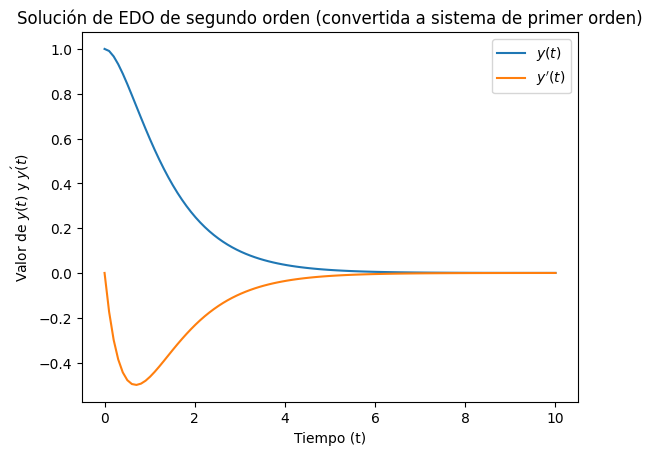

In [ ]:
# Ejemplo 1
# Toma una EDO de 2º orden y la convierte en un sistema de dos EDO de 1º orden (variables "𝑦" y "v"=y′), que se resuelve con solve_ivp.
# Es un sistema acoplado de 2 ecuaciones y muestra el patrón estándar “reducir a primer orden → integrar”.
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir el sistema de EDO de primer orden
def system(t, Y):
    y, v = Y  # Y es un vector que contiene [y, v]
    dydt = v  # Primera ecuación: dy/dt = v
    dvdt = -3*v - 2*y  # Segunda ecuación: dv/dt = -3v - 2y
    return [dydt, dvdt]

# Intervalo de tiempo y condiciones iniciales
t_span = (0, 10)
y0 = [1, 0]  # Condiciones iniciales: y(0) = 1, v(0) = dy/dt(0) = 0

# Resolver el sistema
sol = solve_ivp(system, t_span, y0, t_eval=np.linspace(0, 10, 100))

# Graficar la solución
plt.plot(sol.t, sol.y[0], label=r"$y(t)$")     # y(t)
plt.plot(sol.t, sol.y[1], label=r"$y'(t)$")    # v(t) = y'(t)
plt.xlabel('Tiempo (t)')
plt.ylabel(r'Valor de $y(t)$ y $y\'(t)$')
plt.legend()
plt.title('Solución de EDO de segundo orden (convertida a sistema de primer orden)')
plt.show()

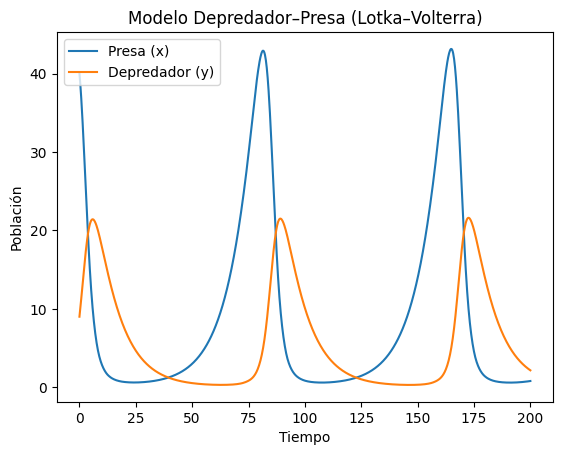

In [ ]:
# Ejemplo 2
# (Lotka–Volterra): modelo clásico presa-depredador, dos ecuaciones no lineales acopladas resueltas con solve_ivp (pasa parámetros con args=...,
# integra y grafica x(t),y(t)). Este es el ejemplo más directo de sistema acoplado.

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Definir el sistema de ecuaciones (modelo depredador–presa)
def predator_prey(t, z, alpha, beta, delta, gamma):
    x, y = z  # z es un vector que contiene [x, y]
    dxdt = alpha * x - beta * x * y   # Ecuación de la presa
    dydt = delta * x * y - gamma * y  # Ecuación del depredador
    return [dxdt, dydt]

# Parámetros
alpha = 0.1   # Tasa de crecimiento de la presa
beta  = 0.02  # Tasa de depredación
delta = 0.01  # Tasa de reproducción del depredador
gamma = 0.1   # Tasa de mortalidad del depredador

# Intervalo de tiempo y condiciones iniciales
t_span = (0, 200)
y0 = [40, 9]  # Poblaciones iniciales: 40 presas, 9 depredadores

# Resolver el sistema de ecuaciones
sol = solve_ivp(predator_prey, t_span, y0,
                args=(alpha, beta, delta, gamma),
                t_eval=np.linspace(0, 200, 1000))

# Graficar los resultados
plt.plot(sol.t, sol.y[0], label='Presa (x)')
plt.plot(sol.t, sol.y[1], label='Depredador (y)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo Depredador–Presa (Lotka–Volterra)')
plt.legend()
plt.show()

## **9) Explora una visualización interactiva de funciones o campos vectoriales usando Plotly o Mayavi. Busca ejemplos de gráficos 3D y describe las herramientas necesarias para realizar estos gráficos en Python.**

Para una visualización interactiva en Google Colab se recomienda utilizar Plotly, porque permite representar superficies y campos vectoriales con interacción nativa (rotación, zoom, paneo, lectura de valores al pasar el cursor) y exportación a HTML/PNG. La generación de datos y mallas se realiza con NumPy. Como alternativa de escritorio, se menciona Mayavi (basada en VTK), adecuada para escenas 3D de alta complejidad y control fino del render, aunque su instalación es más conveniente en entornos locales (conda) y no en Colab.

- **Ejemplo de superficie 3D.** Se representa una superficie z a partir de una matriz de alturas leída desde un CSV público. La matriz se pasa directamente a plotly.graph_objects.Surface, activando contornos sobre el eje z para resaltar niveles. La visualización permite inspeccionar, de forma interactiva, la morfología (crestas, valles, simetrías), y documentar el dominio implicado por la grilla, la resolución de muestreo y la escala de colores utilizada.

Bibliografía: https://plotly.com/python/3d-surface-plots/

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Leer la matriz de alturas desde CSV
z_data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv")

# Superficie 3D con contornos proyectados sobre el eje z
fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

# Título, tamaño y cámara de la escena
fig.update_layout(
    title=dict(text="Superficie 3D — Elevación Mt Bruno"),
    autosize=False,
    scene_camera_eye=dict(x=1.87, y=0.88, z=-0.64),
    width=600, height=550,
    margin=dict(l=65, r=50, b=65, t=90),
    scene=dict(xaxis_title="x", yaxis_title="y", zaxis_title="z")
)
fig.show()

- **Ejemplo de campo vectorial 3D.** Se visualiza un campo vectorial discreto cargado desde un CSV, donde cada punto de la malla aporta las componentes (u,v,w). La representación con plotly.graph_objects.Cone (quiver 3D) muestra dirección y magnitud de los vectores; parámetros como sizeref, aspectratio y camera_eye ajustan la escala y la vista.

Bibliografía: https://plotly.com/python/cone-plot/

In [ ]:
import plotly.graph_objects as go
import pandas as pd

# Cargar campo vectorial desde GitHub (dataset "vortex")
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/vortex.csv")

# Visualización con conos 3D: cada cono representa dirección y magnitud del vector (u,v,w)
fig = go.Figure(data=go.Cone(
    x=df['x'], y=df['y'], z=df['z'],
    u=df['u'], v=df['v'], w=df['w'],
    colorscale='Blues',
    sizemode="absolute",
    sizeref=40
))

# Ajuste de escena (proporciones y cámara)
fig.update_layout(
    title="Campo vectorial 3D (Conos) — dataset vortex",
    scene=dict(
        aspectratio=dict(x=1, y=1, z=0.8),
        camera_eye=dict(x=1.2, y=1.2, z=0.6),
        xaxis_title="x", yaxis_title="y", zaxis_title="z"
    ),
    width=800, height=600
)
fig.show()